<html>
  <head>
    <meta charset="utf-8" >
    <title>網頁範例-左圖右字</title>
    <style>
        .book{
          width: 950px;
          margin: 50px auto;
          border:solid 5px gray;
          overflow: hidden; /* 避免長方框下面顯示不正常 */
        }
        .bdcard{
          width: 300px;
          float:left; /* 圖片在左邊 */
          padding: 20px;
        }
        .bdcard img{
          display: block;
          width:100%;
        }
        .bdtext{
          float: right;  /* 文字在右邊 */
          width: 530px;
          padding: 20px 20px 0px 0px;
        }
    </style>
  </head>
  <body>
    <div class="book">
      <div class="bdcard">
        <img src="./img/FRM_1_cover.jpg" alt="封面" />
      </div>
      <div class="bdtext">
        <h5><span style="background-color:red;">FRM(Financial Risk Manager) 用 Python I <br></h5><br>
        <h4><span style="background-color:blue;">第十二章 Fixed Income 固定收益分析 </span></h4>
        <p> 科學管控財金風險</p>
      </div>
    </div>
  </body>
</html>

<span style="background-color:blue;">複利是世界第八大奇蹟。知之者賺、不知之者被賺。<br>
Compound interest is the eighth wonder of the world. He who understands it, earns it; he who doesn't, pays it.
一阿爾伯特‧愛因斯坦 (Albert Einstein)</span><br>

<span style="background-color:blue;">人生就像是滾雪球，重要的是要找到很濕的雪和很長的坡。<br>
Life is like a snowball.The important thing is finding wet snow and a really long hill.<br>
一沃倫‧巴菲特(Warren Buffett)</span>

<font color=orange>固定收益(fixed income)，作為金融領域最常見的詞彙之一，對其最直觀的解讀便是收益是固定的，它可以簡單地理解為投資人在確定的時間中，得到確定的收益。</font>固定收益產品最常見的範例就是定期存款(term deposit):存款人將現金存入在銀行開設的定期儲蓄帳戶中，期滿時獲得本金(notional)和利息(interest rate)，而本金和利息均為確定的值。<u>固定收益類產品雖然收益率不高，但是面臨的信用風險較小，並且可以提供比較穩定的現金流</u>，對風險厭惡(risk averse)、穩健型的投資人來說，它一般是在其投資組合中佔比最多的部分。

<font color=orange>固定收益類產品還可以令投資組合更加多元化，因為與其他金融產品(例如股票、大宗商品)的相關性小於 1，可以進一步降低投資風險，因此，固定收益類產品也被稱為避險類資產。</font>除了收益時間固定、收益金額固定的產品，例如固定利率債券(fixed rate bond)，固定收益類資產還包括收益時間固定而收益金額不固定的產品，例如浮動利率債券 (floating rate bonhd)。

另外，<u>可贖回債券(callable bond)、可售回債券(puttable bond)也屬於固定收益類產品</u>，對它們來說，贖回或售回的時間無法提前預知，但收益金額固定。比較特殊的是，可轉換公司債券(convertible bond)具有債券和股票的雙重特性，其收益時間和金額均不固定。除了傳統的債券類資產，信用衍生品和利率衍生品都屬於固定收益的範圍。由此可見，固定收益類的產品可謂豐富多彩，吸引了大批金融從業人員和投資者的目光。固定收益類交易目前佔據金融衍生品交易中非常重要的一部分。

<h4><font color=grace>本章核心命令程式</font></h4>
* append() 用於在串列尾端增加新的物件<br>
* len() 傳回物件的長度<br>
* import numpy 匯人入連算套件 numpy<br>
* <u>import  QuantLib 匯人入金融衍生品定價分析軟體函數庫</u><br>
* matplotlib.pyplot.gca().spines[].set_visible() 設定是否顯示某邊框<br>
* matplotlib.pyplot.gca().xaxis.set_ticks_position() 設定x 軸位置<br>
* matplotlib.pyplot.gca().yaxis.set_ticks_position() 設定y軸位置<br>
* matplotlib.pyplot.xlabel() 設定x軸標題<br>
* matplotlib.pyplot.ylable() 設定y軸標題<br>
* numpy.arange() 根據指定的範圍以及設定的步進值，生成一個等差陣列<br>
* numpy.zeros() 傳回給定形狀和類型的新陣列，用零填充<br>


<h4><font color=grace>12.1 時間價值</font></h4>

在介紹具體的固定收益產品之前，不妨先從金錢的<u>時間價值(time value of money)</u> 談起。下面是一個通俗的範例，在薪水結算日，老闆給小王兩個選擇，現在給小王1000元薪水，或明年給小王1000元薪水。相信理性的人都會毫不猶豫的選擇前者。一是因為通貨膨脹會造成貨幣貶值。今天的1000元錢比明年的1000元錢更值錢，這就是金錢的時間價值，即當前持有的一定量的貨幣，比未來的等量貨幣上只有更高的價值。二是
因為沒有人能保證老闆不會破產，明年能支付薪水，所以明年承諾的薪水具有不確定性。人們期望為承擔的風險得到補償。信用越差，則風險越大，人們期望得到的風險補償越高。

假如小王同意明年結算薪資，但同時要求老闆支付5%的利息。那麼明年小王應得的金額是多少呢?實際的金額會隨著利率計算方式的不同而不同。這裡涉及兩個概念---單利和複利。本書之前金融數學部分介紹過這些內容，本節再回顧並更加深入地講解一下。

<u>單利(simple rate)</u>就是利不生利，即本金固定，到期後一次性結算利息，而本金所產生的利息不再計算利息。<u>複利(compounding)</u>就是利滾利，即把上一期的本金和利息作為下一期的本金來計算利息。

假設本金用`PV`表示，投資期限用`n`表示，年利率用`R`表示，每年的複利頻次用`m`表示，在簡單複利(simple compounding)方式下，最終本金和利息之和為:
<font color=pink>
$$ FV=PV\left ( 1+\frac{R}{m} \right )^{mn}(式子12-1) $$
</font>

其中，`PV`為當前價值(present value)，即現值;`FV`為未來價值 (future value)，即終值;`R`為年化利率，即回報率(rate of return); `m`為每年複利頻率(annual compounding frequency); `n`為期限長度(number of years) 。

下面比較了不同複利頻次下得到的金額，如圖12-1所示，隨著複利次數地提高，一年後得到的本金和利息之和也會提高。

In [2]:
# 在matplotlib載入中文
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 因為我已經將此字形放入matpotlib預設字形中，下行的加入新字形可以註解了。
# fontManager.addfont('/home/taomic/下載/TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Noto Serif CJK JP') #Microsoft JhengHei;Taipei Sans TC Beta;

<h5><font color=yellow>在此先岔開主體，來說一下matplotlib的中文字體處理。</h5></font>

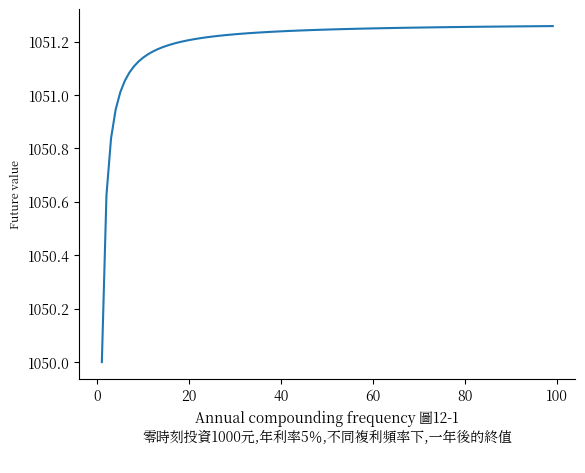

In [2]:
# %load ./B1_Ch12/B1_Ch12_1.py
# B1_Ch12_1.py

# import matplotlib.pyplot as plt
import numpy as np

r = 0.05  #年利率
pv = 1000   # 本金
m = np.arange(1,100)  # m複利頻次
fv = pv*(1+r/m)**m

plt.figure()
plt.plot(m,fv)
plt.xlabel('Annual compounding frequency 圖12-1\n零時刻投資1000元,年利率5％,不同複利頻率下,一年後的終值\n',fontsize=10)
plt.ylabel('Future value',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')


<font color=orange>Tao:<br>
看上面的曲線，總覺得當m=0～20時的曲線太陡。所以下面的計算了 m 與 (m-1) 一年到期時終值的增量。來觀察一下曲線陡的原因:初始時的增量較大，之後的明顯`收斂`。</font>

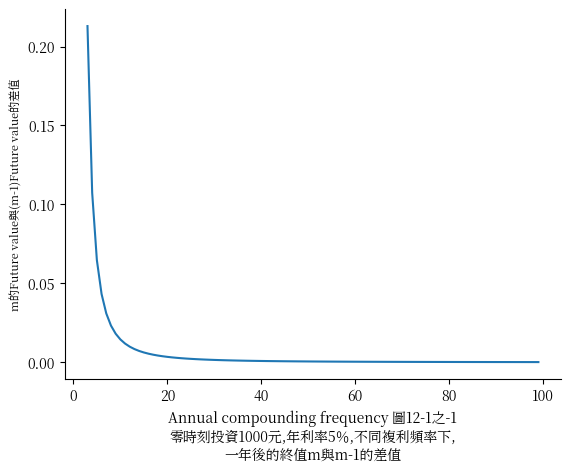

In [5]:
list_fv = list(fv)
temp = 1000
diff_m = [ ]
for i in range(1, 98):
    diff = list_fv[i+1] - list_fv[i]
    diff_m.append(diff)
m1 = list(m)[2:]
plt.figure()
plt.plot(m1,diff_m)
plt.xlabel('Annual compounding frequency 圖12-1之-1\n零時刻投資1000元,年利率5％,不同複利頻率下,\n一年後的終值m與m-1的差值',fontsize=10)
plt.ylabel('m的Future value與(m-1)Future value的差值',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

In [8]:
print(f'前三項的差:{diff_m[:3]}')
print(f'後三項的差:{diff_m[-3:]}')

前三項的差:[0.2129629629628198, 0.10737395109936188, 0.06471318593798969]
後三項的差:[0.00014101853093961836, 0.000138141602747055, 0.0001353518134692422]


<font color=grace>Tao:<br>
單利的利息為1000*0.05=50，一次複利則成為50.625增加了0.625，二次複利50.837，三次複利50.945，可以看出『只要採了用複利』，初始時增量較大，之後的`m`增加所產生的終值`收斂`。所以有了下面的極限值。</font>

當複利頻次 m趨近於無限大時，應用極限定理，將式(12-1)改寫為:
<font color=pink>
$$FV=\displaystyle \lim_{m \to \infty }PV\left ( 1+\frac{R}{m} \right )^{mn}=PVexp\left ( Rn \right )(式子12-2)$$
</font>

稱為**連續複利**。

此例中，相當於小王作為債權人，把1000塊錢本金借給了債務人---老闆，雙方商定的還款時間是明年。也可以認為是老闆發行了期限為一年的債券。假設雙方商定的借款時間不是整年，這裡又會涉及<u>協定日數(day count convention)</u> 的問題。

在本章中，會利用到`QuantLib`運算函數庫，<u>它是一個常用的金融衍生品定價分析軟體函數庫</u>。表 12-1 是`QuantLib`運算函數庫中常見的幾種日數協定。以比較常見的"ActualActual"為例，指的是用數日曆的方法得到從起始日到截止日這一段時間的實際天數，除以這一年的實際天數，由此把這個時間段轉化為年，來進行下一步的計算。而對於"Business252"，只考慮從開始到結束的營業日，去除了週末和節假日，分母是固定的252天。<br>

表 12-1 Quantlib 中幾種常見日數協定
|協定天數|
|:----|
|ActualActual: 實際天數 / 實際天數|
|Thirty360 : 一年按 360 天計算，一個月按 30 天計算|
|Actual360 : 分子用實際天數，分母用 360|
|Acetual365Fixed : 分子用實際天數，分母用 365|
|Actual365NoLeap : 分子用實際天數 ， 分母用 365，所有年份都是 365 天|
|Business252 : 分子是實際營業日的天數，分母統一為252天|
|SimpleDayCounter : 簡單的日計數|

假設在這個範例中，小王等不及合約期滿，急需一筆現金，把債權(在民間它有一個大家比較熟悉的名字---空頭支票)轉讓給別人，這就相當於債券在二級市場(secondary market)上交易。<u>這是債券和貸款 (loan) 的重要區別，貸款不可以在市場上交易</u>。

再假設這個範例中，合約中規定，小王在到期日前，可以找老闆兌付「空頭支票」，這時債券相當於可售回 (可賣回)債券(puttable bond)。如果小王在合約期滿前發現了收益更高並且風險更低的投資機會，就會選擇兌付「空頭支票 」，收回本金和利息進行另外的投資。小王因為獲得了更多的權利，所以可售回債券會比一般的債券收益率更低，即可售回債券的價格更貴(假設合約期滿拿回的金額一定，小王在期初投入了更多的本金購買該債券，之後的章節會再次介紹收益率和價格的關係)。

<font color=grace>Tao:上面所說的「空頭支票」與一般認知不符。稱為「不記名的保付支票」較恰當。</font>

那麼相反的，合約中規定，老闆在到期日前，可以找小王贖回「空頭支票」，這個債券相當於可贖回債券 (callable bond)。也許老闆在合約到期前，現金流問題得到改善，沒有必要再繼續向小王支付利息，又或發現了小李承諾收取更低的利息，他因此找到了更低廉的籌措到資金的方式，就會選擇向小王支付本金和利息，贖回「空頭支票」。債務人老闆因為獲得了更多的權利，所以可贖回債券會比一般的債券收益率更高，即可贖回債券的價格更低。

在本例中，債務人老闆發行的「債券」相當於<s>零息</s>債券，因為只能在結算日拿到本金和利息。同時屬於固定利率債券，利息的金額在債券的發行日就已確定;如果是浮動利率債券，則利息的金額在債券的發行日尚末確定。

<font color=grace>Tao:上面稱老闆的為「零息債券」並不正確，因為零息債券（ Zero Coupon Bond ）是一種不支付利息的債券，又稱為折價債券。在此處有支付利息，就是「債券」Bond:發行者為籌集資金而發行、在約定時間支付一定比例的利息，並在到期時償還本金的一種有價證券。。</font>

<h4><font color=grace>12.2 債券介紹</font></h4>

希望12.1節的範例可以讓大家對傳統的固定收益類產品 ---債券建立一些初步認識，在本節將舉出債券比較正式的定義。

債券(bond)是發債人為籌措資金，按照法定程式發行的有價證券。發債人一般是政府、企業或金融機構，承諾按商議好的利率條款支付利息，並按約定好的時間償還本金。購買者可以是個人投資者或是組織、機構(如養老基金等)。

<font color=orange>債券的基本要素包括面額(face value, par, par value)、息票率(coupon rate)和到期時間(time to maturity)</font>。債券的面額，指債券的票面價值，需要標明幣種，是發行人在債券到期後應償還的金額，也是利息的計算依據。而另外一個概念，為名義本金(notional principal, notional principal amount)，指的是交易雙方在合約中確定的交易金額。債券的息票率是指債券利息與債券面額的比率，是年化數值。面額和息票率共同決定了投資者的利息報酬。息票率受很多因素影響，一般銀行利率越高，發行者的信用狀況越差，到期時間越長，資金市場越緊賬，息票率就越高;反之息票率就越低。

零息債券(zero coupon bond)不含息票，以低於面額的價格發行，到期時按票面金額兌付，利息隱含在發行價格和兌付價格的差價裡。如圖12-2、圖 12-3 和圖 12-4 從發行人即債券發售者的角度，舉出了三種債券現金流示意圖，分別對應零息、期末和期初付息一次的固定息票債券。

<img
  src="./img/ch12-2.png"
  alt="FRM_Python_1_12"
  width="300"
  height="180" />
  <img
  src="./img/ch12-3.png"
  alt="FRM_Python_1_12"
  width="300"
  height="180" />
  <img
  src="./img/ch12-4.png"
  alt="FRM_Python_1_12"
  width="300"
  height="180" />

如 圖12-2、圖12-3 和圖12-4 所示，從投資人的角度來看，`PV`(present value) 是投資人用來購買債券的支出，也就是債券的發行價格(此處忽略其他支出，如交易手續費等)。`Par` 是投資人在合約期滿時收到的金額，價值等於債券的面額。那麼，`Par`和 `PV`總是相等嗎? 不一定。只有在債券的面額等於債券實際的發行價格時，即等價發行時兩者才會一致，這樣的債券稱為平價債券(par bond)。 發行價格大於面額稱為溢價債券(premium bond)，小於面額稱為折價債券(discount bond)。

如果是含息票的債券，還會有定期的利息收入 `C`。注意如果半年付息一次的利息收入是 `C/2`。如果是每季付息一次，每次的利息收入是 `C/4` 。這是因為債券的息票率是年化後的結果，每次的利息收入要在年化利息的基礎上除以每年的付息頻次。            

根據債券要素之一的到期時間來分類，債券可分為短期、中長期和長期。<u>以交易規模最大的美國國債市場為例，短期國庫券(Treasury Bills，T-Bills)到期時間在一年或一年以內，例如一個月期、三個月期、六個月期和一年期，短期國庫券一般都是零息債券</u>。國庫票據(Treasury Notes,T-Notes)屬於中長期債券，一般到期時間是 2~10年，每半年付息一次。國庫債券(Treasury Bond, T-Bonds)是長期債券，一般到期時間為 10年以上，也是每半年付息一次，目前最長的到期時間是 30年。

以上和這些都是固定息票的債券。還有一種常見的浮動利率債券叫作通脹保值債券(treasury inflation protected securities, TIPS)。浮動息票率由消費價格指數 (consumer price index， CPI)來決定。

此外，還有一種沒有到期日、無限期定期支付利息，而不還本的債券，稱為年金債券或永久債券 (perpetual bond, annuity)，如圖 12-5 所示為年金債券的現金流示意圖。投資者初始的投資金額為PV，之後每年收到價值為 A的現金流。值得一提的是，年金保險在文藝作品中也亮過相，比如英國作家毛姆的短篇小說《食蓮人》(The Lotus-eater)，就寫到了一個人在 35歲時用全部財產買下為期 25年的年金保險。它的受歡迎程度可見一斑。

<img
  src="./img/ch12-5.png"
  alt="FRM_Python_1_12"
  width="400"
  height="280" />

<font color=orange>債券的其他要素還包括是否也抵押資產作為借款擔保，是否有其他人作為借款擔保，是否附有贖回權、附有售回權、附有可轉換權以及違約如何處理，等等</font>。除此之外的要素還包括是新債券(on-the-run)還是老債券(off-the-run)。新債券的流動性要好於老債券。

<h4><font color=grace>12.3 到期收益率</font></h4>

債券的價格指的是債券在市場上交易的價格。表12-2舉出某日債券的交易資訊，報價按照收益率、全價和淨價顯示。首先了解一下收益率的含義。債券的理論價格，如式(12-3)所示，等於<u>未來現金流進行貼現後的總和</u>。
<font color=pink>
$$PV=\frac{C}{1+y}+\frac{C}{(1+y)^{2}}+\frac{C}{(1+y)^{3}}+\cdots +\frac{C}{(1+y)^{n}}+\frac{Par}{(1+y)^{n}} (式子12-3)$$
</font>

其中，`PV`為現值，`C`為票息，`Par`為到期時收到的本金，`y`為貼現率，假設到期時間為 `n`年，每年底付息一次。注意這裡的貼現方法用的是單利。

<span style="background-color:blue;">到期收益率(yield to maturity, YTM)</span>，也稱債券收益率(bond yield)，指的是用該<s>收益</s>貼現率`y`將債券持有到期、應收到的所有現金流(利息和本金)進行折現，計算出的債券價格(理應)剛好等於債券的市場價格。債券價格和到期收益率之間是此消彼長、互相關聯的，如圖12-6所示。

<img
  src="./img/ch12-6.png"
  alt="FRM_Python_1_12"
  width="400"
  height="280" />

<span style="background-color:blue;">有了到期收益率這個指標，就可以將不同價格、不同息票率、不同到期時間的債券進行比較分析</span>。舉例來說，表12-2中最後一列舉出了不同債券的到期收益率。      

表 12-2 債券行情資訊
|程式|淨價|淨價|應計利息|全價|全價|剩餘天數|全價賣出收益率%|
|----|----|----|:----:|----|----|:----:|----|
||買入|賣出||買入|賣出|||||
|1|103.61|103.67|0.14|103.75|103.81|719|2.754|
|2|104.06|104.12|0.00|104.06|104.12|730|2.427|
|3|104.27|104.33|1.70|105.97|106.03|781|2.592|
|4|100.13|100.14|1.54|101.67|101.68|29|1.924|
|5|100.37|100.39|1.08|101.45|101.47|78|1.919|
|6|100.49|100.50|0.76|101.25|101.26|113|2.227|
|7|100.59|100.61|0.13|100.72|100.74|169|2.519|

在上文提到過，等價發行時的債券稱為平價債券，發行價格大於面額的債券稱為溢價債券，小於面額的債券稱為折價債券。如圖12-7所示，從另一個角度來講，一般情況，如果一個附息債券以面額首發，也就是平價債券，那麼它的息票率和YTM應該相等。如果息票率大於YTM，為溢價債券。如果息票率小於YTM，為折價債券。

<img
  src="./img/ch12-7.png"
  alt="FRM_Python_1_12"
  width="400"
  height="280" />
  
以下程式可以獲得圖12-7。

<font color=grace>Tao:下面程式碼的第10行，在此補充說明一下。<br>
>numpy.arange(start, stop, step, dtype = None)<br>
此函式在給定間隔內傳回均勻間隔的值，返回的是ndarray。
參數：
- start —— 開始位置，數字，可選項，預設起始值為0
- stop —— 停止位置，數字
- step —— 步長，數字，可選項， 預設步長為1，如果指定了step，則也必須給予出start。
- dtype —— 輸出陣列的類型。如果未給出dtype，則從其他輸入參數推斷資料類型。

x-軸就是ytm所定的區間。</font>


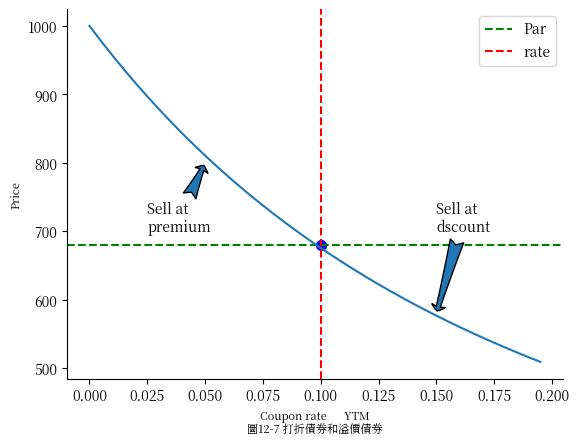

In [13]:
# %load ./B1_Ch12/B1_Ch12_2.py
# B1_Ch12_2.py

import numpy as np
import matplotlib.pyplot as plt

coupon_rate = 0.1 # 利率
Par = 1000        # 到期的本金
n = 10            # 年期
ytm = np.arange(0,0.2,0.005)
pv = 0

for i in range(n):
    pv = Par*coupon_rate/(1+ytm)**i + pv 

# plt.plot([0, 1750], [100, 100], color="green")
# plt.plot([0, 1750], [0.1, 100], linestyle= '--', color="r")
# fig = plt.figure()
# ax = fig.add_subplot(111 )    
# ax.plot([0.1], [680], ' x ' )
plt.scatter(0.1,680,s = 50,color = 'b')
plt.axhline(680, linestyle= '--',color= 'green', label='Par')
plt.axvline(0.1, 0, 680, linestyle= '--', color= 'r', label='rate')
plt.annotate('Sell at\ndscount',
            xy=(0.15,580),
            xytext=(0.15,700),
            arrowprops={
                'arrowstyle':'fancy, head_width=1, tail_width=1'},
            fontsize=10)
# plt.text(0.02,800,'Sell at\npremium',color= 'green',{'fontsize':14})
# plt.text(0.15,550,'Sell at\ndscount',{'fontsize':14})
plt.annotate('Sell at\npremium',
            xy=(0.05,800),
            xytext=(0.025,700),
            arrowprops={
                'arrowstyle':'fancy, head_width=1, tail_width=1'},
            fontsize=10)
plt.legend()
plt.plot(ytm,pv)
plt.xlabel('Coupon rate      YTM\n圖12-7 打折債券和溢價債券',fontsize=8)
plt.ylabel('Price',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# Tao:下面兩行多餘的。
# plt.gca().yaxis.set_ticks_position('left')
# plt.gca().xaxis.set_ticks_position('bottom')

<u>債券報價中經常用到的另外兩個名詞:`全價`和`淨價`</u>。觀察表12-2可以發現，全價和淨價之間相差的金額是應計利息。在剛剛完成付息之後，此時應計利息為零，全價和淨價相等。

<img
  src="./img/ch12-8.png"
  alt="FRM_Python_1_12"
  width="400"
  height="280" />

全價(full price, dirty price or gross price)，相當於實際成交價格，包含應計利息 (accrued interest, `AI`)。淨價(clean price, quoted price， or flat price)不含有應計利息的價格。淨價、全價和應計利息三者關係展示如圖12-8所示，可以看到全價在圖中的形狀是鋸齒狀的，每隔一段週期債券的全價會也一個突然地減少。這個現象是由定期支付債券利息引起的。鋸齒的起落是應計利息的變化 。而淨價本身不受應計利息影響，它的波動更容易反映出市場因素(利率、信用風險等)的波動情況。

應計利息 `AI` 的算式為:
<font color=pink>
$$ AI=C\frac{t}{\bigtriangleup T}(式子12-4)$$
</font>

其中，`C`為債券利息現金流;`t`為距離上一個付息日的時間;$\Delta T$為付息間隔時間，單位可以是天(營業日、或日曆日)，或是年，比如說 0.5年(每年付息兩次，或每半年付息一次)、1年(每年付息一次)。$\frac{t}{\Delta T}$的計算涉及12.1節介紹過的日數協定，讀者可以回顧一下。

假設在到達下一個付息日之前，債券的持有人甲，將債券賣給乙，那麼將要收到的這部分利息該如何分配呢?答案是應計利息`AI`歸甲方所有;剩下的那部分利息，即 `C-AI`，歸乙方所有，如圖 12-9所示。

<img
  src="./img/ch12-9.png"
  alt="FRM_Python_1_12"
  width="400"
  height="280" />

如圖 12-10展示的是全價和淨價隨`到期收益率(YTM)`的變化關係。可以看出，兩者呈類似反比例的關係。`YTM`某種意義上代表利率的平均水準，因此可以簡單地說，如果利率下降，那麼債券的價格會上升，利率上升，債券的價格會下降。

<img
  src="./img/ch12-10.png"
  alt="FRM_Python_1_12"
  width="400"
  height="280" />


[QuantLib](https://pypi.org/project/QuantLib/)<br>
[QuantLib-昀騰學習園地](https://www.facebook.com/groups/421949278879071/)<br>

<font color=grace>Tao:下面取至「QuantLib-昀騰學習園地」FB。</font><br>

<div style="border-width: 1px; border-style:solid ; width: 1000px; height: 930px; border-color: rgb(255, 172, 85); padding: 5px; text-align: left">
2023年終回顧與展望
在離開銀行業後，一直覺得台灣的金融業在金工的發展實在很不理想，因此想要在離開體制後，做一些努力來改變現況。一方面當然是想把30年來學到的金工技術傳遞下去，另一方面也想來改變這個不理想的現況。所謂當仁不讓，大概也就是這個意思吧！
在經過長時間的努力，一些項目在今年終於陸陸續續的開花結果。首先，值得一提的是我幫元富證券債券部開發的六個複雜結構商品的評價專案，在七月底正式結案。這個案子在歷經Covid 19的艱難時光，延期了一年多，終於完成了。這個案子包含了Zero Coupon Callable、Callable IRS<font color=grace>[利率交換契約(interest rate swap:IRS)</font>]、CMS Daily Range Accrual Callable Note，這三類市場上實際銷售的產品。運用到了Hull-White、G2++、LMM，這些複雜的利率模型。在配合美式模擬法的數值運算下，我也把GPU的實現都完成了。這是我個人學習金融產品開發的一大成就，也算是一個完美的句點。
其次，今年七月我在MasterTalks推出了QuantLib的金融衍生商品套利交易的應用課程。對於想要開發交易系統的IT背景朋友，金融計算實在是一個大門檻，裡面充滿了複雜的計算細節。透過QuantLib的使用，IT朋友也能很快掌握這些金融知識陰暗面。另外，即使是金融背景的朋友，如果沒有真的做過實務計算工作，大概也無法知道如何進行複雜的真實運算。透過這個課程，QuantLib的真實應用價值才會彰顯出來，IT界的朋友也可以由此跨入金融工程的應用。只有當IT與金融知識互相交流，金融工程才會真正的茁壯。
第三、我著墨多時的指數選擇權高頻套利交易系統的原型已經開發完成，可以進行展示應用。這個系統是我離開銀行，與證券界朋友交流後，觸發動機想要完成的系統。原因在於我在銀行針對GPU的高能運算研究頗深，覺得可以把此技術應用在證券高頻交易之上。目前的原型是以C# + CUDA在Windows上開發的，不排除之後改到Linux上用C++ + CUDA來運行。我跟台灣與大陸的朋友都有一些接觸，未來看看哪裡適合應用。
第四、我在大陸的知乎論壇寫了85篇文章，介紹QuantLib在產品開發、高頻套利交易與Basel III風險管理的應用。QuantLib的應用潛力非常的高，亞洲地區如果要發展另一個金融中心，勢必要有堅強的金工技術來支持。以我認知，目前除了QuantLib，市場上沒有第二個開源專案可以扮演此一角色。這85篇文章也讓我在大陸市場得到不少回響，有軟體公司直接找我合作。一些銀行圈的朋友，也都因此認識了我。上週去浦發銀行簡報，行內的專家也表示有看到我的文章，知道我在QuantLib上的研究。事後我們還進一步交流QuantLib的使用心得。
第五、因為知乎論壇上QuantLib文章受到重視，我與深圳的《優量在線》合作舉辦QuantLib的應用實作課程，打算推出Python與C++兩個班別。有不少朋友都在詢問課程內容，由於報名人數已達開課要求，目前Python班已確定推出。在2024/4/1，QuantLib實作班將正式在大陸開課。我對QuantLib的期許，也將會因此課程而實現成真，令人欣慰。
期待明年，這些努力的成果能進一步發揚光大。我30年來在金工上的研究，能因QuantLib的推廣而遍地開花。<br>

[利率交換(IRS) 固定期限交換利率(CMS)](http://www.chris.url.tw/2_rate2.htm)IRS (Interest Rate Swap) & CMS（Constant Maturity Swap）

<h5><font color=yellow>再一次岔開主體，來介紹一下 QuantLib套件。</h5></font>

以下程式可以獲得圖 12-10，此處呼叫了`QuantLib`運算函數庫。`QuantLib`是一個開放原始碼的運算函數庫，提供了固定收益產品和金融衍生品的定價分析，可以在`Python` 呼叫。初次使用前需要下載與自己電腦和`Python`相對應的`QuantLib` 版本，用 pip進行安裝。  

<font color=grace>Tao:<br>
執行下方程式碼時有2處報錯，11與13行。QuantLib的Python套件改版後面，函數參數或名稱改變了。</font>

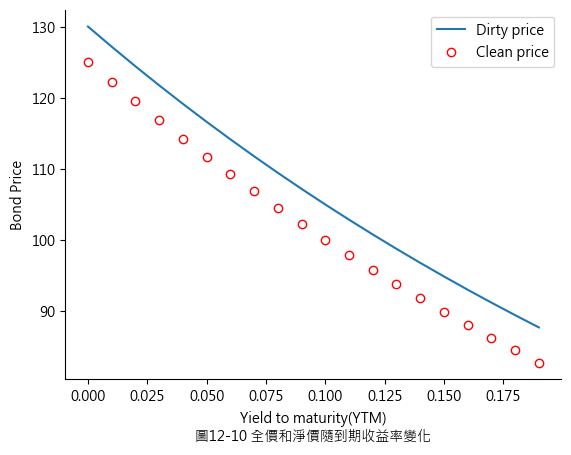

In [6]:
# %load ./B1_Ch12/B1_Ch12_3.py
# B1_Ch12_3.py

import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(10, 7, 2017)
ql.Settings.instance().evaluationDate = todaysDate
# dayCount = ql.Thirty360()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
# calendar = ql.UnitedStates()
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(15, 1, 2017)
maturityDate = ql.Date(15, 1, 2020)
tenor = ql.Period(ql.Semiannual)
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
couponRate = .1
coupons = [couponRate]

# Now lets construct the FixedRateBond
settlementDays = 3
faceValue = 100
fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)
# ql.FixedRateBond(settlementDays, calendar, faceAmount, startDate, maturityDate, tenor, coupon, paymentConvention)
ytm = np.arange(0,0.2,0.01)
cleanPrice = np.zeros(len(ytm))
dirtyPrice = np.zeros(len(ytm))

for i in range(len(ytm)):
    cleanPrice[i] = fixedRateBond.cleanPrice(ytm[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    dirtyPrice[i] = fixedRateBond.dirtyPrice(ytm[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    
plt.plot(ytm, dirtyPrice,label='Dirty price')
plt.plot(ytm, cleanPrice,'o',color ='r',fillstyle='none',label='Clean price')
plt.legend(loc='upper right')
plt.xlabel('Yield to maturity(YTM)\n圖12-10 全價和淨價隨到期收益率變化',fontsize=10)
plt.ylabel('Bond Price',fontsize=10)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')


如圖 12-11展示的是打折債券和溢價債券淨價隨時間變化的規律。在債券到期時，債券的淨價回歸債券面額(pull to par)。

<img
  src="./img/ch12-11.png"
  alt="FRM_Python_1_12"
  width="400"
  height="280" />

以下程式可以獲得圖 12-11。<br>
[QuantLib 類別參考](https://rkapl123.github.io/QLAnnotatedSource/d8/df8/class_quant_lib_1_1_fixed_rate_bond.html)FixedRateBond Class Reference

fixedRateBond1:     July 15th, 2015   4.250000
fixedRateBond1:  January 15th, 2016   4.250000
fixedRateBond1:     July 15th, 2016   4.250000
fixedRateBond1:  January 17th, 2017   4.250000
fixedRateBond1:     July 17th, 2017   4.250000
fixedRateBond1:  January 16th, 2018   4.250000
fixedRateBond1:     July 16th, 2018   4.250000
fixedRateBond1:  January 15th, 2019   4.250000
fixedRateBond1:     July 15th, 2019   4.250000
fixedRateBond1:  January 15th, 2020   4.250000
fixedRateBond1:  January 15th, 2020   100.000000
fixedRateBond2:     July 15th, 2015   1.500000
fixedRateBond2:  January 15th, 2016   1.500000
fixedRateBond2:     July 15th, 2016   1.500000
fixedRateBond2:  January 17th, 2017   1.500000
fixedRateBond2:     July 17th, 2017   1.500000
fixedRateBond2:  January 16th, 2018   1.500000
fixedRateBond2:     July 16th, 2018   1.500000
fixedRateBond2:  January 15th, 2019   1.500000
fixedRateBond2:     July 15th, 2019   1.500000
fixedRateBond2:  January 15th, 2020   1.500000
fixedRateBo

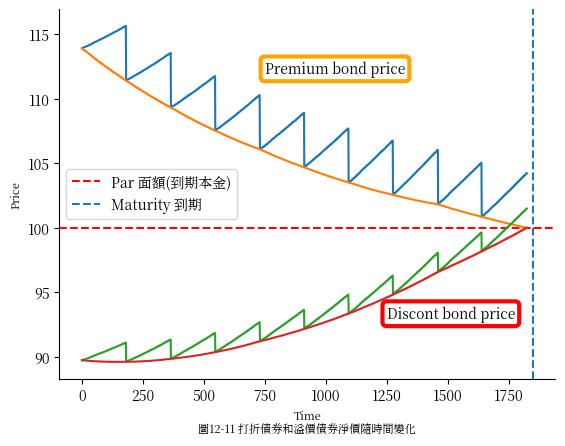

In [12]:
# %load ./B1_Ch12/B1_Ch12_4.py
# B1_Ch12_4.py

import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(15, 1, 2015)
spotDates = [ql.Date(15, 1, 2015),ql.Date(15, 1, 2016), ql.Date(15, 1, 2017),
             ql.Date(15, 1, 2018),ql.Date(15, 1, 2019),ql.Date(15, 1, 2020)]
spotRates = [0.027, 0.035, 0.042, 0.047, 0.052, 0.055]

# dayCount = ql.Thirty360()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
# calendar = ql.UnitedStates()
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(15, 1, 2015)
maturityDate = ql.Date(15, 1, 2020)
tenor = ql.Period(ql.Semiannual)
# calendar = ql.UnitedStates()
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
# dayCount = ql.Thirty360()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
couponRate1 = .085
coupons1 = [couponRate1]

couponRate2 = .03
coupons2 = [couponRate2]

# Now lets construct the FixedRateBond
settlementDays = 0
faceValue = 100
fixedRateBond1 = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons1, dayCount)
fixedRateBond2 = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons2, dayCount)
# Tao註:1826為2015-01-15到2020-01-15天數。
dirtyPrice1 = np.zeros(1826)
cleanPrice1 = np.zeros(1826)
dirtyPrice2 = np.zeros(1826)
cleanPrice2 = np.zeros(1826)

for i in range(1826):
    ql.Settings.instance().evaluationDate = todaysDate + i
    spotCurve = ql.ZeroCurve(spotDates, spotRates, dayCount, calendar, interpolation,
                                 compounding, compoundingFrequency)
    spotCurveHandle = ql.YieldTermStructureHandle(spotCurve)

    # create a bond engine with the term structure as input;
    # set the bond to use this bond engine
    bondEngine = ql.DiscountingBondEngine(spotCurveHandle)
    fixedRateBond1.setPricingEngine(bondEngine)
    fixedRateBond2.setPricingEngine(bondEngine)

    # Finally the price
    fixedRateBond1.NPV()
    dirtyPrice1[i] = fixedRateBond1.dirtyPrice()
    cleanPrice1[i] = fixedRateBond1.cleanPrice()
    
    fixedRateBond2.NPV()
    dirtyPrice2[i] = fixedRateBond2.dirtyPrice()
    cleanPrice2[i] = fixedRateBond2.cleanPrice()

for c in fixedRateBond1.cashflows():
    print(f"fixedRateBond1:{f'{c.date()}':>20}   {c.amount():.6f}") 
    # print('%20s %12f' % (c.date(), c.amount())) 
for c in fixedRateBond2.cashflows():
    print(f"fixedRateBond2:{f'{c.date()}':>20}   {c.amount():.6f}")
    # print('%20s %12f' % (c.date(), c.amount())) 

# plt.plot([0, 1750], [100, 100], color="green")
plt.axhline(100, linestyle= '--',color= 'r', label='Par 面額(到期本金)')
plt.axvline(1850, 0, 100, linestyle= '--', label='Maturity 到期')
plt.legend()
plt.plot(dirtyPrice1)
plt.plot(cleanPrice1)
plt.plot(dirtyPrice2)
plt.plot(cleanPrice2)
plt.text(1250, 93,'Discont bond price',fontsize=10,bbox={
    'boxstyle':'round',
    'facecolor':'w',
    'edgecolor':'#f00',
    'pad':0.3,
    'linewidth':3})
plt.text(750, 112,'Premium bond price',fontsize=10,bbox={
    'boxstyle':'round',
    'facecolor':'w',
    'edgecolor':'orange',
    'pad':0.3,
    'linewidth':3})
plt.xlabel('Time\n圖12-11 打折債券和溢價債券淨價隨時間變化',fontsize=8)
plt.ylabel('Price',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

<font color=yellow>Tao:看一下上面程式碼的第74行。有關f-string的對齊。</font>

之前提到的債券價格和收益率關係的公式，也可以看作債券的價格 PV由末來現金流折現得到。
<font color=pink>
$$ PV=\frac{C}{1+y}+\frac{C}{(1+y)^{2}}+\frac{C}{(1+y)^{3}}+\cdots +\frac{C}{(1+y)^{n}}+\frac{Par}{(1+y)^{n}} (式子12-5同12-3)$$
</font>

此處假設貼現利率y是恒定的，然而更準確的方法是按照現金流發生的時間，用其對應的即期利率或零息利率(zero rate or spot rate)進行貼現，式(12-5)變化為:<br>
<font color=pink>
$$PV=\frac{C}{(1+y_{1})}+\frac{C}{(1+y_{2})^{2}}+\frac{C}{(1+y_{3})^{3}}+\cdots+\frac{C}{(1+y_{n})^{n}}+\frac{Par}{(1+y_{n})^{n}}(式子12-6)$$
<br></font>

其中 ，$y_{n}$為不同期限的零息利率。

假設y代表連續複利下的收益率，則式(12-6)變為:<br>
<font color=pink>
$$PV=Cexp(-y_{1})+Cexp(-2y_{2})+Cexp(-3y_{3})+\cdots+Cexp(-ny_{n})+Parexp(-ny_{n})(式子12-7)$$
</font>

下面介紹如何根據債券價格得到即期利率。票息逐層剝離法(bootstfapping yield curve) 是其中最常用的一種方法。這個程式中，輸入資料為不同到期時間的幾個債券的資訊(到期時間、債券的息票率和債券當前價格)，可以計算日複利的即期利率。如圖 12-12所示。


[wallstreetMojo](https://www.wallstreetmojo.com/bootstrapping-yield-curve/)bootstrapping-yield-curve<br>
<font color=grace>Bootstrapping Yield Curve Explained</font><br>
The bootstrapping yield curve refers to the technique used in the financial market in which an yield curve is derived from a set of interest rates and or the yields of financial products having coupons, like the bonds or the bootstrapping yield curve from swap rates.  It shows the relationship between the time at which the debt instruments mature and their interest rates.
自舉殖利率曲線解釋<br>
自舉殖利率曲線是指金融市場中使用的技術，其中殖利率曲線是從一組利率和/或具有息票的金融產品的收益率得出的，例如債券或來自掉期利率的自舉收益率曲線。它顯示了債務工具到期時間與其利率之間的關係。

This yield curve can be constructed by using certain steps. First it is necessary to collect yields or the market prices of a set of various debt instruments which has different maturities. Such financial instruments can be corporate or government bonds, or any other fixed income instruments. Then there is the process of selecting the instruments as per the maturity dates. The one with the shortest maturity is taken first which may be a treasury bill. This price or the yield will be the interest for the shortest maturity in the yield curve.<br>
此收益率曲線可以透過使用某些步驟來建構。首先，有必要收集一組具有不同期限的各種債務工具的收益率或市場價格。此類金融工具可以是公司債或政府債券，或任何其他固定收益工具。然後是根據到期日選擇工具的過程。首先取出期限最短的票據，這可能是國庫券。該價格或收益率將是收益率曲線中最短期限的利息。

Next, using the above yield, the forward rate of the next maturity is calculated, using interpolation techniques. Ater that the yield curve is extended by compounding the above implied forward rate with the current maturity yield. The derived result is the yield in the curve for the next maturity.<br>
接下來，使用上述收益率，使用插值技術計算下一個期限的遠期利率。之後，透過將上述隱含遠期利率與當前到期殖利率結合來延長殖利率曲線。得出的結果就是下一個期限的曲線殖利率。

The above process continues by calculating the implied forward rates and taking the yield curve bootstrapping to the next maturity until the calculation covers the desired maturity range. In each step, the yield of the previous maturity is used, and the implied forward rate is calculated.<br>
上述過程繼續計算隱含遠期利率，並將殖利率曲線引導至下一個到期日，直到計算涵蓋所需的到期日範圍。在每個步驟中，都會使用前一到期的報酬率，並計算隱含遠期利率。

It is important to validate the yield curve against any additional market prices or yields. This will ensure the reliability and accuracy of the curve that has been derived. There are some techniques like the cubic spines or any other interpolation methods, which will make the curve stable.<br>
根據任何額外的市場價格或收益率來驗證殖利率曲線非常重要。這將確保所導出的曲線的可靠性和準確性。有一些技術，如立方脊柱或任何其他插值方法，可以使曲線穩定。

yrs:0.0  0.25  0.5  1.0  1.5  2.0  

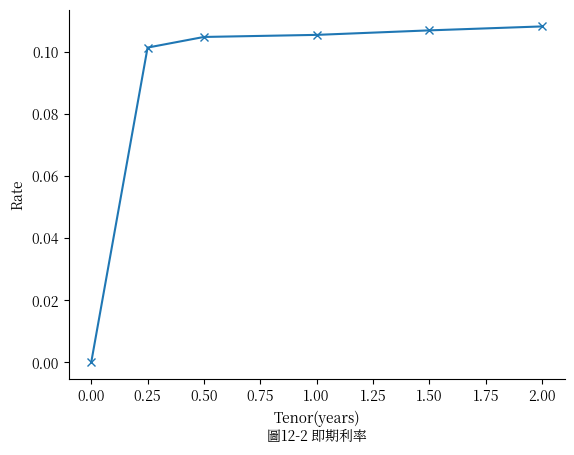

In [3]:
# %load ./B1_Ch12/B1_Ch12_5.py
# B1_Ch12_5.py

import QuantLib as ql
import matplotlib.pyplot as plt

calc_date = ql.Date(15, 1, 2020)
ql.Settings.instance().evaluationDate = calc_date

data = [
    ('15-01-2020', '15-04-2020', 0, 97.5),
    ('15-01-2020', '15-07-2020', 0, 94.9),
    ('15-01-2020', '15-01-2021', 0, 90.0),
    ('15-01-2020', '15-07-2021', 8.0, 96.0),
    ('15-01-2020', '15-01-2022', 12.0, 101.6),
]

helpers = []
# day_count = ql.Thirty360()
day_count = ql.Thirty360(ql.Thirty360.BondBasis)
settlement_days = 0
face_amount = 100

for issue_date, maturity, coupon, price in data:
    price = ql.QuoteHandle(ql.SimpleQuote(price))
    issue_date = ql.Date(issue_date, '%d-%m-%Y')
    maturity = ql.Date(maturity, '%d-%m-%Y')
    schedule = ql.MakeSchedule(issue_date, maturity, ql.Period(ql.Semiannual))
    helper = ql.FixedRateBondHelper(price, settlement_days, face_amount, schedule, [coupon / 100], day_count)
    helpers.append(helper)
    
yieldcurve = ql.PiecewiseLogCubicDiscount(calc_date, helpers, day_count)   
spots = []
tenors = []
print('yrs:',end='')
for d in yieldcurve.dates():
    yrs = day_count.yearFraction(calc_date, d)
    print(f'{yrs}  ',end='')
    compounding = ql.Compounded
    # compounding = ql.Simple
    freq = ql.Semiannual
    freq = ql.Quarterly
    freq = ql.Daily
    # freq = ql.Continuous
    zero_rate = yieldcurve.zeroRate(yrs, compounding, freq)
    tenors.append(yrs)
    eq_rate = zero_rate.equivalentRate(day_count,
                                       ql.Compounded,
                                       freq,
                                       calc_date,
                                       d).rate()
    spots.append(eq_rate)
    

plt.plot(tenors,spots,'x-')
plt.xlabel('Tenor(years)\n圖12-2 即期利率',fontsize=10)
plt.ylabel('Rate',fontsize=10) 
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# plt.gca().yaxis.set_ticks_position('left')
# plt.gca().xaxis.set_ticks_position('bottom')

<h4><font color=grace>12.4 存續期間</font></h4>

在本章的開始，介紹過到期期限是債券的主要元素之一，然而到期期限並不能反映出債券的平均還款期限。舉個範例，現在有兩個還款金額同為100元的債券:<br>
- 債券A，兩年後還款100元，中間沒有任何現金流;<br>
- 債券B，第一年年底還款50元，第二年年底還款50元。<br>
很明顯債券B相當於提前還款，平均還款時間更短。<br>
<font color=grace>Tao:『平均還款時間更短』的說法是指:單就時間來看，<br>
A債券還款時間計算為`2年*100=200`;<br>
B債券還款時間計算為`1年*50+2年*50=150` 的差異。</font>

這裡需要引入麥考利存續期間(Macaulay duration)來反映「平均還款時間」的概念。通俗地講，麥考利存續期間是用權重調整過的到期期限，把本金和利息全都收回的加權時間總和。權重為每次支付的現金流的現
值佔現金流現值總和的比率，而權重的總和為 1。

麥考利存續期間$D_{MAC}$可以透過式 (12-8) 計算。
<font color=pink>
$$D_{MAC}=\frac{\sum_{i=1}^{n}t_{i}PV_{i}}{\sum_{i=1}^{n}PV_{i}}=\frac{\sum_{i=1}^{n}t_{i}PV_{i}}{P}=\sum_{i=1}^{n}t_{i}\frac{PV_{i}}{p}(式子12-8)$$
</font>

其中，`i`為現金流的次序(indeXxes the cash flows)，`P`為未來現金流的總現值(present value of all the cash flow)，$PV_{i}$為第i個現金流的現值(present value of the ith cash flow)，$t_{i}$ 為第`i`個現金流所在以年為單位的時間跨度(time in years until the ith payment will be received)。

麥考利存續期間首先由加拿大經濟學家麥考利(Frederick Macaulay)(1882一1970)在1938年提出，最初用來度量回收投資的平均時間。

之前提到的計算債券價格的公式中 現金流的折算用的是單利法，這裡依舊使用上文提到的到期收益率y來折算現金流，採用連續複利法。
<font color=pink>
$$P=\sum_{i=1}^{n}c_{i}exp(-yt_{i})$$
$$D_{MAC}=\sum_{i=1}^{n}t_{i}\frac{PV_{i}}{P}=\sum_{i=1}^{n}t_{i}\left [ \frac{c_{i}exp(-yt_{i})}{P} \right ]$$
</font>

其中，$c_{i}$代表著對應著時刻$t_{i}$，的第i個現金流，其他各項含義同之前的公式相同，這裡不再贅述。

如圖12-13所示為到期期限為n年的債券現金流示意圖，付息頻率為1次/年。

<img
  src="./img/ch12-13.png"
  alt="FRM_Python_1_12"
  width="400"
  height="280" />
  

在債券分析中，存續期間已經超越了時間的概念，投資者更多地把它用來衡量債券價格變動對利率變化的敏感度。這是怎樣實現的呢?

債券價格P和收益率y，存在以下關係:
<font color=pink>
$$ P=\sum_{i=1}^{n}c_{i}exp(-yt_{i}) (式子12-10)$$
</font>

當y發生較小的變化$\Delta y$時，P的變化可以由以下一階近似表示為:
<font color=pink>
$$\Delta P=\frac{dP}{dy}\Delta y=-\Delta y\sum_{i=1}^{n}c_{i}t_{i}exp(-yt_{i})(式子12-11)$$
</font>

而根據存續期間的定義 :
<font color=pink>
$$D_{MAC}=\sum_{i=1}^{n}t_{i}\left [ \frac{c_{i}exp(-yt_{i})}{P} \right ](式子12-12)$$
</font>

債券價格的變動可以寫為 :
<font color=pink>
$$\Delta P=-\Delta y\sum_{i=1}^{n}c_{i}t_{i}exp(-yt_{i})=-PD_{MAC}\Delta y(式子12-13)$$
</font>

也可以寫為 :
<font color=pink>
$$\frac{\Delta P}{P}=-D_{MAC}\Delta y(式子12-14)$$
</font>

即債券價格變化和收益率的變化存在一種線性關係，而存續期間就是線性關係的係數。存續期間越大，債券價格對收益率的變化越敏感，即利率風險越大。

在上面的推導中，用到了一個假設條件，即`y`代表連續複利的收益率。在`y`代表年複利的情況下，債券價格`P`和和收益率`y`存在以下關係 :
<font color=pink>
$$P=\sum_{i=1}^{n}\frac{c_{i}}{\left ( 1+y \right )^{i}}(式子12-15)$$
</font>

當`y`發生較小的變化$\Delta y$時，`P`的變化可以由以下一階近似表示為 :
<font color=pink>
$$\Delta P=\frac{dP}{dy}\Delta y=-\frac{\Delta y}{1+y}\sum_{i=1}^{n}\frac{c_{i}}{\left (1+y \right )^{i}}=-\frac{\Delta y}{1+y}PD_{MAC}(式子12-16)$$
</font>

整理後寫為
<font color=pink>
$$\Delta P=-\Delta yPD^{*}(式子12-17)$$
</font><br>
其中，$D^{*}$為式 (12-18) 所示:
<font color=pink>
$$D^{*}=\frac{D_{MAC}}{1+y}(式子12-18)$$
</font>

即為修正存續期間(modified duratiom)。如果用m來表示付息頻率，修正存續期間和麥考利存續期間兩者的關係就變為:
<font color=pink>
$$D_{MAC}=\frac{D_{MAC}}{1+\frac{y}{m}}(式子12-19)$$
</font>

麥考利存續期間和修正存續期間受哪些因素影響呢?觀察以上存續期間公式不難發現下述規律。

首先，其他因素相同的情況下，債券到期時間越長，存續期間就越大。對於零息債券，債券的到期時間即為存續期間。

其次，其他因素相同的情況下，到期收益率`YTM`越小，債券的存續期間越大，具體關係如圖12-14所示。`YTM` 較小時，後期的現金流有相對較大的現值，因此有更大的權重，從而時間的加權平均相對越大，存續期間因此更大。相反，`YTM` 較大時，相比前期現金流，後期的現金流打折越大，從而時間加權平均相對越小，因此存續期間越小。

<img
  src="./img/ch12-14.png"
  alt="FRM_Python_1_12"
  width="400"
  height="280" />

以下程式可以用來獲得圖 12-14。

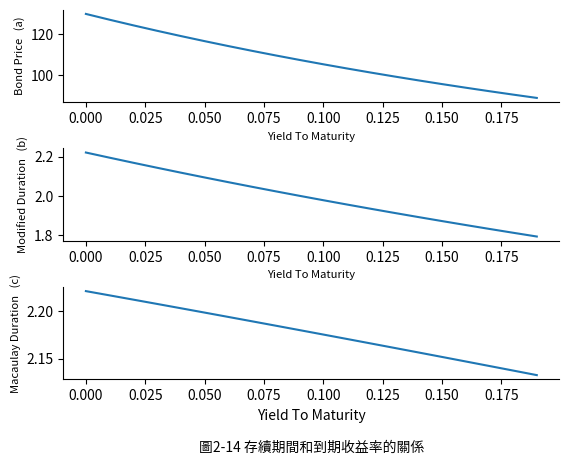

In [3]:
# %load ./B1_Ch12/B1_Ch12_6.py
# B1_Ch12_6.py


import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(10, 7, 2017)
ql.Settings.instance().evaluationDate = todaysDate
# dayCount = ql.Thirty360()
# calendar = ql.UnitedStates()
# dayCount = ql.Thirty360()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
# calendar = ql.UnitedStates()
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(15, 1, 2017)
maturityDate = ql.Date(15, 1, 2020)
tenor = ql.Period(ql.Semiannual)
# calendar = ql.UnitedStates()
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
# dayCount = ql.Thirty360()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
couponRate = .1
coupons = [couponRate]

# Now lets construct the FixedRateBond
settlementDays = 3
faceValue = 100
fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)

ytm = np.arange(0,0.2,0.01)
duration_mod = np.zeros(len(ytm))
duration_mac = np.zeros(len(ytm))
dirtyPrice = np.zeros(len(ytm))

for i in range(len(ytm)):
    y=ytm[i]
    duration_mod[i] = ql.BondFunctions.duration(fixedRateBond,y,ql.ActualActual(ql.ActualActual.ISDA), ql.Compounded, ql.Annual, ql.Duration.Modified)
    duration_mac[i] = ql.BondFunctions.duration(fixedRateBond,y,ql.ActualActual(ql.ActualActual.ISDA), ql.Compounded, ql.Annual, ql.Duration.Macaulay)
    # cleanPrice[i] = fixedRateBond.cleanPrice(ytm[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    dirtyPrice[i] = fixedRateBond.dirtyPrice(y,fixedRateBond.dayCounter(), ql.Compounded, ql.Annual)

#   57-58兩行的參數原為ql.ActualActual() 改為ql.ActualActual(ql.ActualActual.ISDA)  
plt.figure(1)
plt.subplot(311)    
plt.plot(ytm, dirtyPrice)
plt.xlabel('Yield To Maturity',fontsize=8)
plt.ylabel('Bond Price   (a)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(312)    
plt.plot(ytm, duration_mod)
plt.xlabel('Yield To Maturity',fontsize=8)
plt.ylabel('Modified Duration   (b)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(313)   
plt.plot(ytm, duration_mac)

plt.xlabel('Yield To Maturity\n\n圖2-14 存續期間和到期收益率的關係',fontsize=10)
plt.ylabel('Macaulay Duration   (c)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.subplots_adjust(hspace=0.5)


最後，其他因素相同的情況下，息票利率越低，債券的存續期間越長，具體關係如圖 12-15 所示。這一點很好理解，息票利率低時，早期的現金流越小，權重越小，對加權平均的時間影響相對較小，最後時間點的那
筆現金流的權重相對來說很大，因此存續期間越大。反之，當息票利率越高時，早期的現金流越大，這樣較短的時間節點有更大的權重，因此加權平均時間越小，存續期間越小。
<font color=grace>Tao:
上面提到的存續時間都指的是:麥考利存續時間(Macaulay Duration)。</font>

<img
  src="./img/ch12-15.png"
  alt="FRM_Python_1_12"
  width="400"
  height="280" />

<font color=lightgreen>相關知識補給站:</font>
在實務上存續期間有兩種常用的計算方式，一種是<span style="background-color:blue;">馬考雷存續期間（Macaulay Duration），另一種是修正存續期間（Modified Duration）</span>。馬考雷存續期間是由Frederick Macaulay在1938年所提出，後人依此命名。存續期間衡量某張債券的持有人平均在多少時間後可以拿回債券的配息和本金。Macaulay的債券存續時間用的平均是加權平均。每個支付的利息和本金都有一個加權值，而這個權值等於該利息或本金的現值占債券現值的比例。修正存續期間和馬考雷存續期間不同，單位不是年，但它也是用來衡量如果利率變化1%，債券價格預期會改變多少，計算公式是用麥考利存續期間算出來的數字/（1+到期殖利率/年配息次數）。

由於馬考雷存續期間衡量投資者必須持有債券直到債券現金流的現值等於為債券支付的金額的加權平均時間，因此債券基金經理人經常使用它來通過債券免疫策略（Immunization）管理債券投資組合風險。

相比之下，修正存續期間確定了收益率每百分比變化的存續期間變化量，同時衡量利率變化對債券價格的影響程度。因此，修正存續期間可以通過估算債券價格隨著利率上升而下降的幅度，因此多使用來為債券投資者提供風險衡量標準。

 

以下程式可以用來獲得圖 12-15。

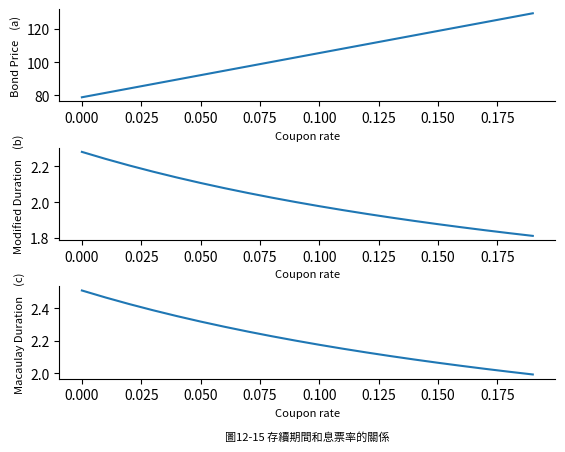

In [28]:
# %load ./B1_Ch12/B1_Ch12_7.py
# B1_Ch12_7.py

import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(10, 7, 2017)
ql.Settings.instance().evaluationDate = todaysDate
# dayCount = ql.Thirty360()
# calendar = ql.UnitedStates()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(15, 1, 2017)
maturityDate = ql.Date(15, 1, 2020)
tenor = ql.Period(ql.Semiannual)
# calendar = ql.UnitedStates()
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
# dayCount = ql.Thirty360()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
couponRate = np.arange(0,0.2,0.01)

# Now lets construct the FixedRateBond
settlementDays = 3
faceValue = 100

ytm = .1
duration_mod = np.zeros(len(couponRate))
duration_mac = np.zeros(len(couponRate))
dirtyPrice = np.zeros(len(couponRate))

for i in range(len(couponRate)):
    coupons = [couponRate[i]]
    fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)
    duration_mod[i] = ql.BondFunctions.duration(fixedRateBond,ytm,ql.ActualActual(ql.ActualActual.ISDA), ql.Compounded, ql.Annual, ql.Duration.Modified)
    duration_mac[i] = ql.BondFunctions.duration(fixedRateBond,ytm,ql.ActualActual(ql.ActualActual.ISDA), ql.Compounded, ql.Annual, ql.Duration.Macaulay)
    # cleanPrice[i] = fixedRateBond.cleanPrice(ytm[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    dirtyPrice[i] = fixedRateBond.dirtyPrice(ytm,fixedRateBond.dayCounter(), ql.Compounded, ql.Annual)
    
plt.figure(1)
plt.subplot(311)    
plt.plot(couponRate, dirtyPrice)
plt.xlabel('Coupon rate',fontsize=8)
plt.ylabel('Bond Price    (a)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(312)    
plt.plot(couponRate, duration_mod)
plt.xlabel('Coupon rate',fontsize=8)
plt.ylabel('Modified Duration    (b)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(313)   
plt.plot(couponRate, duration_mac)
plt.xlabel('Coupon rate\n\n圖12-15 存續期間和息票率的關係',fontsize=8)
plt.ylabel('Macaulay Duration    (c)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.subplots_adjust(hspace=0.5)


[綠角財經筆記](https://greenhornfinancefootnote.blogspot.com/2007/08/macaulay-duration.html)macaulay-duration說明

目前講到的兩個存續期間---麥考利存續期間和修正存續期間，在應用時有一個重要的假設，即債券現金流不隨利率波動變化。也就是說，債券沒有任何保護條款，例如債券贖回、債券售回權，等等。有可贖回、可售回權利時，債券的現金流就不是固定的，即債券可能會在到期日之前被提前贖回或售回而終止。對於現金流不固定的債券，就需要用有效存續期間(effective duratlon) 來計算:
<font color=pink>
$$ D_{eff}=\frac{P_{-\Delta y}-P_{+\Delta y}}{2P_{0}\times \Delta y}(式子12-20)$$
</font>

或表示為:
<font color=pink>
$$ D_{eff}=\frac{P_{0}-P_{+\Delta y}}{P_{0}\times \Delta y}(式子12-21)$$
</font>

整理後得到:
<font color=pink>
$$P_{Duration-approx}=P_{0}(1-D\cdot \Delta y)(式子12-22)$$
</font>

收益率y變化$\Delta y$時，可以根據式(12-22)估算新的債券價值。注意式(12-22)的減號，因為存續期間D定義附帶負號。

當y發生較小的變化$\Delta y$時，根據泰勒一階展開方法，用存續期間估算債券價值較為準確。

如圖 12-16所示為債券收益率y變化對債券價值的影響。如圖 12-17所示為債券估值和實際值之間的誤差，即圖 12-16中藍色曲線和紅色直線之差。

<img
  src="./img/ch12-16&17.png"
  alt="FRM_Python_1_12"
  width="650"
  height="380" />

以下程式可以獲得圖 12-16 和圖 12-17。

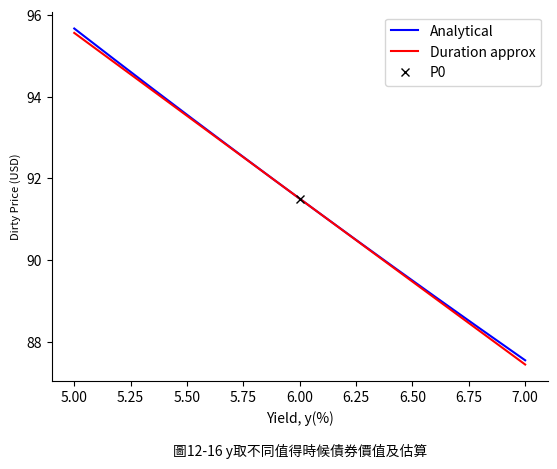

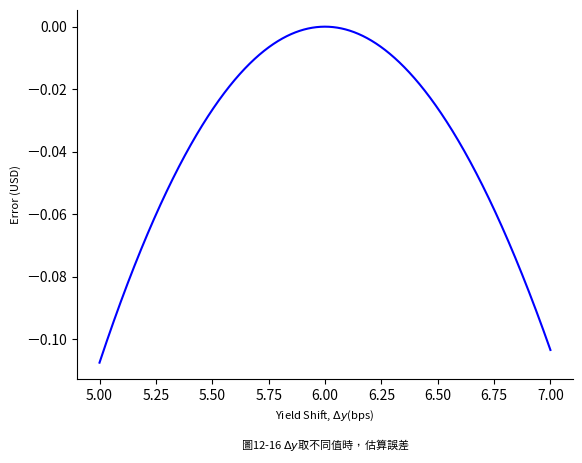

In [33]:
# %load ./B1_Ch12/B1_Ch12_8.py
# B1_Ch12_8.py

import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(1, 7, 2020)
ql.Settings.instance().evaluationDate = todaysDate
# dayCount = ql.Thirty360()
# calendar = ql.UnitedStates()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(1, 7, 2020)
maturityDate = ql.Date(15, 7, 2025)
tenor = ql.Period(ql.Semiannual)
# calendar = ql.UnitedStates()
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
# dayCount = ql.Thirty360()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
couponRate = .04
coupons = [couponRate]

# Now lets construct the FixedRateBond
settlementDays = 3
faceValue = 100
fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)

delta_y_base = 0.0001
ytm = np.arange(5.0,7.0,delta_y_base)*0.01
approxPrice = np.zeros(len(ytm))
dirtyPrice = np.zeros(len(ytm))


P0 = fixedRateBond.dirtyPrice(0.06,fixedRateBond.dayCounter(), compounding, ql.Semiannual)
P_up = fixedRateBond.dirtyPrice(0.060 + delta_y_base,fixedRateBond.dayCounter(), compounding, ql.Semiannual)
P_down = fixedRateBond.dirtyPrice(0.060 - delta_y_base,fixedRateBond.dayCounter(), compounding, ql.Semiannual)
duration = (P_down - P_up)/(2*P0*delta_y_base)

for i in range(len(ytm)):
    delta_y = ytm[i] - 0.06
    approxPrice[i] = P0*(1-duration*delta_y)
    dirtyPrice[i] = fixedRateBond.dirtyPrice(ytm[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    
plt.figure(1)    
plt.plot(ytm*100, dirtyPrice,label='Analytical',color = 'b')
plt.plot(ytm*100, approxPrice,color ='r',label='Duration approx')
plt.plot(6, P0,'x',color ='k',fillstyle='none',label='P0')
plt.legend(loc='upper right')
plt.xlabel('Yield, y(%)\n\n圖12-16 y取不同值得時候債券價值及估算',fontsize=10)
plt.ylabel('Dirty Price (USD)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.figure(2) 
plt.plot(ytm*100, approxPrice-dirtyPrice,color ='b')
plt.xlabel('Yield Shift, $\Delta y$(bps)\n\n圖12-16 $\Delta y$取不同值時，估算誤差',fontsize=8)
plt.ylabel('Error (USD)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')


圖 12-17所示為債券估值和實際值之間的誤差，即圖 12-16中藍色曲線和紅色直線之差。

<h4><font color=grace>12.5 關鍵利率存續期間</font></h4>

前面介紹的幾種存續期間適用於收益率曲線平行移動(parallel shift)的情況。如圖 12-18舉出了收益率曲線的幾種可能的變化。對於非平行移動，應該如何衡量債券對利率的敏感度呢?這時候需要用到關鍵利率存續期間(key rate duration, partial duration)。即假設其他年限的即期利率 (spot rates) 不變，只有一個年限的即期利率(spot rate)變化。所以，一個債券在每一個期限都有一個關鍵利率存續期間(Key rate duration)。

<img
  src="./img/ch12-18.png"
  alt="FRM_Python_1_12"
  width="450"
  height="450" />

同時，存續期間的概念不僅應用在單一債券上，還廣泛應用在債券的投資組合中。

關鍵利率存續期間以某些關鍵利率期限為基礎，衡量固定收益證券價格對利率的敏感性。關鍵利率存續期間計算方法類似有效存續期間，具體為:
<font color=pink>
$$D_{key rate}=\frac{P_{down}-P_{up}}{2P_{0}\times \Delta y}(式子12-23)$$
</font>

給定當前利率期限(影像如圖 12-19所示)。圖 12-19中`X`為關鍵利率期限為2年、5 年、10 年和 20 年，這四個關鍵利率期限將圖 12-19橫軸分割出五個區間。

<img
  src="./img/ch12-19.png"
  alt="FRM_Python_1_12"
  width="450"
  height="450" />

計算某個關鍵利率存續期間時，該關鍵期限利率上升或下降$\Delta y$，而$\Delta y$對附近非關鍵期限利率的影響是線性遞減關係。如圖 12-20所示，5年期關鍵期限左右兩側分別是 2年期和 10年期關鍵期限;5年期關鍵期限，利率變化水準為$\Delta y$ = 50 bps(0.005)。圖 12-20同時舉出 5年期關鍵期限利
率變化水準$\Delta y$對 2年期和 10年期關鍵期限利率影響為 0。 5年期關鍵期限利率變化水準$\Delta y$對非關鍵期限(3年和 7年)影響線性遞減。

<img
  src="./img/ch12-20.png"
  alt="FRM_Python_1_12"
  width="650"
  height="450" />

圖 12-20(b)中，藍色利率期限可以用來計算 P0，粉紅色利率期限可以用來計算$P_{up}$，綠色利率期限可以用來計算$P_{down}$。這樣利用關鍵利率存續期間計算公式，可以計算得到 5年期關鍵利率期限有效存續期間。

如圖 12-21所示，10年期關鍵利率期限變化水準$\Delta y$對 7年期和 15年期影響線性遞減。採用同樣的想法，可以計算得到 10年期關鍵利率期限有效存續期間。

<img
  src="./img/ch12-21.png"
  alt="FRM_Python_1_12"
  width="650"
  height="450" />

而幾個關鍵利率期限首尾兩個期限處理上稍有不同，對於 2年、5年、10年、20年這四個關鍵期限，2年和20年就是首尾兩個關鍵期限。如圖12-22所示，小於2年的非關鍵利率期限$\Delta y$ 和2年一致，大於2年(小於5年)的$\Delta y$非關鍵期限線性遞減。而對於 20 年關鍵期限，如圖 12-23所示，大於 20年的非關鍵利率期限$\Delta y$和20年一致，小於 20年(大於10年)的非關鍵期限$\Delta y$線性遞減。

<img
  src="./img/ch12-22.png"
  alt="FRM_Python_1_12"
  width="450"
  height="350" />
<img
  src="./img/ch12-23.png"
  alt="FRM_Python_1_12"
  width="450"
  height="350" />

如圖12-22(a)、圖12-21(a)、圖12-22(a)、圖12-23(a)所示為四關鍵利率期限(2 5 10 20)分割初五個區間中，每個不同區間利率水準變化$\Delta y$的分段函數。

下面舉出計算債券在2年、5年、10年、20年四個關鍵利率存續期間的程式。

nodes可以返回曲線的日期和匯率，但要小心，返回的匯率是連續匯率。在內部，QuantLib 儲存連續的比率，即使使用離散或簡單的比率，以便在轉換後的類別中儲存。

In [1]:
# %load ./B1_Ch12/B1_Ch12_9.py
# B1_Ch12_9.py


import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(18, 8, 2020)
tenor_tmp =[0, 1, 3, 6, 12, 24, 3*12, 5*12, 7*12, 10*12, 15*12, 20*12, 25*12, 30*12]
# 取得日期串列， 依據todaysDate加上tenor_tmp的月數。
spotDates = [ todaysDate + ql.Period(x,ql.Months) for x in tenor_tmp ]
spotRates = [0.0, 0.005, 0.0075, 0.01, 0.012, 0.015, 0.018, 0.025, 0.03, 0.032, 0.035, 0.038, 0.0385, 0.0375]
# dayCount = ql.Thirty360()
# calendar = ql.UnitedStates()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Semiannual

issueDate = ql.Date(18, 8, 2020)
maturityDate = ql.Date(18, 8, 2045)
tenor = ql.Period(ql.Semiannual)
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
couponRate1 = .05
coupons1 = [couponRate1]

# Now lets construct the FixedRateBond
settlementDays = 0
faceValue = 100
fixedRateBond1 = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons1, dayCount)

ql.Settings.instance().evaluationDate = todaysDate
spotCurve = ql.ZeroCurve(spotDates, spotRates, dayCount, calendar, interpolation,
                             compounding, compoundingFrequency)
spotCurveHandle = ql.RelinkableYieldTermStructureHandle(spotCurve)
# create a bond engine with the term structure as input;
# set the bond to use this bond engine
bondEngine = ql.DiscountingBondEngine(spotCurveHandle)
fixedRateBond1.setPricingEngine(bondEngine)

# Finally the price
P0 = fixedRateBond1.dirtyPrice()
print(f'dirtyPrice:{P0}')

nodes = [ 0, 2, 5, 10, 20, 30 ]  # the durations
dates = [ todaysDate + ql.Period(n,ql.Years) for n in nodes ]
spreads = [ ql.SimpleQuote(0.0) for n in nodes ] # null spreads to begin
new_curve = ql.SpreadedLinearZeroInterpolatedTermStructure(
    ql.YieldTermStructureHandle(spotCurve),
    [ ql.QuoteHandle(q) for q in spreads ],
    dates)
spotCurveHandle.linkTo(new_curve)
bondEngine = ql.DiscountingBondEngine(spotCurveHandle)
fixedRateBond1.setPricingEngine(bondEngine)

delta_y = 0.005
for i in range(4):   
    if i == 0: # 2
        spreads[i].setValue(-delta_y) #0.005 50 bps
        spreads[i + 1].setValue(-delta_y) #0.005 50 bps
        P_down = fixedRateBond1.dirtyPrice()
        print(f'{i}   P_down:  {P_down}')
        
        spreads[i].setValue(delta_y) #0.005 50 bps
        spreads[i + 1].setValue(delta_y) #0.005 50 bps
        P_up = fixedRateBond1.dirtyPrice()
        print(f'{i}     P_up:  {P_up}')
        
        duration = (P_down - P_up)/(2*P0*delta_y) 
        print(f'{i} duration:  {duration}')
        
        spreads[i].setValue(0) #0.005 50 bps
        spreads[i + 1].setValue(0) #0.005 50 bps
        
    elif i == 3:#20
        # plt.figure(i)
        spreads[i + 1].setValue(-delta_y) #0.005 50 bps
        spreads[i + 2].setValue(-delta_y) #0.005 50 bps
        P_down = fixedRateBond1.dirtyPrice()
        print(f'{i}   P_down:  {P_down}')
        
        spreads[i + 1].setValue(delta_y) #0.005 50 bps
        spreads[i + 2].setValue(delta_y) #0.005 50 bps
        P_up = fixedRateBond1.dirtyPrice() 
        print(f'{i}     P_up:  {P_up}')
        
        duration = (P_down - P_up)/(2*P0*delta_y) 
        print(f'{i} duration:  {duration}')
        
        spreads[i + 1].setValue(0.0) #0.005 50 bps
        spreads[i + 2].setValue(0.0) #0.005 50 bps
        
    else:#5 10
        # plt.figure(i)
        spreads[i + 1].setValue(-delta_y) #0.005 50 bps
        P_down = fixedRateBond1.dirtyPrice()
        print(f'{i}   P_down: {P_down}')
        
        spreads[i + 1].setValue(delta_y) #0.005 50 bps
        P_up = fixedRateBond1.dirtyPrice() 
        print(f'{i}     P_up:  {P_up}')
        
        duration = (P_down - P_up)/(2*P0*delta_y) 
        print(f'{i} duration:  {duration}')
        spreads[i + 1].setValue(0.0) #0.005 50 bps


dirtyPrice:122.11819236382954
0   P_down:  122.27280667588722
0     P_up:  121.96484417223118
0 duration:  0.25218396841194896
1   P_down: 122.60163403960796
1     P_up:  121.64380919787493
1 duration:  0.7843424662554446
2   P_down: 123.5945009084255
2     P_up:  120.69719385803899
2 duration:  2.3725433486228673
3   P_down:  129.7505442200993
3     P_up:  115.29882927769611
3 duration:  11.834203129495119


In [ ]:
type(spotCurve)

In [ ]:
spotCurve.nodes()

((Date(18,8,2020), 0.0),
 (Date(18,9,2020), 0.004993760397174018),
 (Date(18,11,2020), 0.007485972557668312),
 (Date(18,2,2021), 0.009975083022077936),
 (Date(18,8,2021), 0.011964143355094863),
 (Date(18,8,2022), 0.014944029677402064),
 (Date(18,8,2023), 0.017919482742943596),
 (Date(18,8,2025), 0.024845039997114217),
 (Date(18,8,2027), 0.029777224987501103),
 (Date(18,8,2030), 0.031746698312580326),
 (Date(18,8,2035), 0.034697276669226146),
 (Date(18,8,2040), 0.03764350848117534),
 (Date(18,8,2045), 0.03813412543445144),
 (Date(18,8,2050), 0.03715277114587091))

表示零息利率與期限關係的圖稱為零息利率曲線（Zero Curve）或即期利率曲線（Spot Rate Curve）。
語法:
ql.ZeroCurve(dates, yields, dayCounter, cal, i, comp, freq)

|Dates|The date sequence, the maturity date corresponding to the zero interestn rate. Note: The first date must be the base date of the curve, such as a date with a yield of 0.0.|
|----|----|
|yields|a sequence of floating point numbers, zero coupon yield|
|dayCounter|DayCounter object, number of days calculation rule|
|cal|Calendar object, calendar|
|i|Linear object, linear interpolation method|
|comp and freq|are preset integers indicating the way and frequency of payment|

In [5]:
bondEngine

<QuantLib.QuantLib.DiscountingBondEngine; proxy of <Swig Object of type 'ext::shared_ptr< DiscountingBondEngine > *' at 0x7f1a9777cff0> >

<h4><font color=grace>12.6 凸性</font></h4>

本章存續期間一節介紹了在收益率變化比較小的情況下，債券價格和債券收益率`YTM`之間存在近似的線性關係。然而，當收益率變化比較大的時候，只考慮債券價格對`YTM`的一階導數就不夠準確，需要引入債券價格對`YTM`的二階導數，即債券凸性(bond convexity)

從圖形上來講，凸性是對債券價格曲線彎曲程度的一種度量。凸性的絕對值越大，債券價格曲線彎曲程度越大。如圖 12-24所示，A債券凸性為正值，C債券凸性為負值。B 債券凸性為零。

<img
  src="./img/ch12-24.png"
  alt="FRM_Python_1_12"
  width="450"
  height="350" />

凸性往往和含權債券聯繫在一起，常見的正凸性 (Positive Convexity)證券包括可售回債券(puttable bond)。常見的負凸性(Negative  Convexity)證券包括可贖回債券(callable bond) 和房貸抵押債券(Mortgage-Backed Security, MBS) 。

如果兩個債券的存續期間相同，但凸性不同，當`YTM`發生變化時，會分別對它們的價格產生怎樣的影響呢? 如圖 12-24所示，A債券比 B債券有更高的凸性。當`YTM`下降或利率下降時，A債券價格上漲幅度更大;當利率上升時，A債券價格下降幅度更小。藍色曲線始終位於紅線直線上方。 

簡而言之，凸性令債券具有「放大收益降低損失」的特性。

既然凸性令債券具有「放大收益降低損失」的吸引人的特性，是不是投資人應該選擇凸性更大的債券呢?事實上，債券的價格中已經考慮了凸性的因素。回顧 12.1節的範例，如果想要獲得凸性為正值的可售回債券，即小王如果想要隨時向老闆兌換債券，投資人需要付出更高的價錢(代表債券更低的收益率)。凸性越大，債券價格就越貴。就是說，天下沒有免費的午餐。同理，投資人只需要付出較低的價錢(代表債券更高的收益率) 就可以獲得凸性為負值的可贖回債券，即老闆如果想要隨時向小王召回債券。

綜上，投資人需要在收益率和凸性之間做出選擇。如果他認為市場上凸性的價值被高條了，或說選擇權被執行的可能性很低，可以選擇賣出凸性，即購買凸性為負值的可贖回債券。反之，如果他認為市場上凸性的價值被低估了，或說選擇權被執行的可能性很高，可以選擇買人和信凸性，即購買凸性為正值的可售回債券。

如圖 12-25所示，凸性為負值的可贖回債券的價格要低於普通債券。對應的如 12-26所示，凸性為正值的可售回債券的價格要高於普通債券。

<img
  src="./img/ch12-25&26.png"
  alt="FRM_Python_1_12"
  width="650"
  height="350" />

以下程式可以繪製圖 12-25和圖 12-26。  

[存續期間（Duration）及債券價格凸性（Convexity）衡量債券風險](https://ctbcsec.win168.com.tw/Article/Info/0669aced-aa29-4400-8b36-72643e8cbeb7)<br>
<font color=lightgreen>知識補給站</font><br>
債券風險管理工具除了常使用的存續期間，其次會考量到債券風險的工具是凸性（Convexity），凸性是衡量債券價格和債券收益率之間關係的曲線彎曲程度或曲線程度的指標。

債券凸性的關鍵重點<br>
- 凸性是一種風險管理工具，用於衡量和管理投資組合的市場風險敞口。
- 凸性是衡量債券價格和債券殖利率率之間關係曲率的指標。
- 凸性可推測債券的存續期間如何隨著利率的變化而增減。
- 如果債券的存續期間隨著利率的增加而增加，則稱該債券具有負凸性。
- 如果債券的存續期間隨著利率的增加而下降，則稱該債券具有正凸性。
- 債券凸性高的債券，在利率上漲或下跌，價格對於利率的敏感度都較低。

凸性建立在存續期間概念的基礎上，通過衡量債券存續期間對利率變化的敏感性。關於債券存續期間，凸性是衡量利率風險的更好方法。在存續期間假設利率和債券價格具有線性關係的情況下，凸性允許其他因素並產生斜率。

存續期間可以很好地衡量債券價格因利率的小幅和突然波動而受到的影響。債券價格和利率之間的關係通常更加傾斜或凸出。因此，當利率大幅波動時，凸度是評估對債券價格影響的更好衡量標準。

固定收益投資組合的風險意味著隨著利率上升，現有的固定利率工具不再那麼有吸引力。隨著凸性降低，市場利率敞口減少，債券投資組合可被視為避險工具。通常，票面利率或殖利率越高，債券的凸性或市場風險就越低。這種風險降低是因為市場利率必須大幅上升才能超過債券的票面利率，這意味著投資者的利率風險較小。但是其他風險，如違約風險等，可能仍然存在。

<font color=grace>Tao:<br>
下方程式碼原本為26-27行，更改成 24-25行。CallabilityPrice was renamed to BondPrice。<br>
[module-quantlib-has-no-attribute-callabilityprice](https://stackoverflow.com/questions/68607187/module-quantlib-has-no-attribute-callabilityprice)

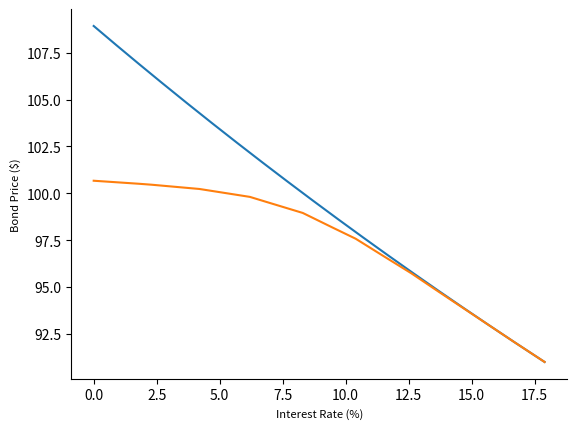

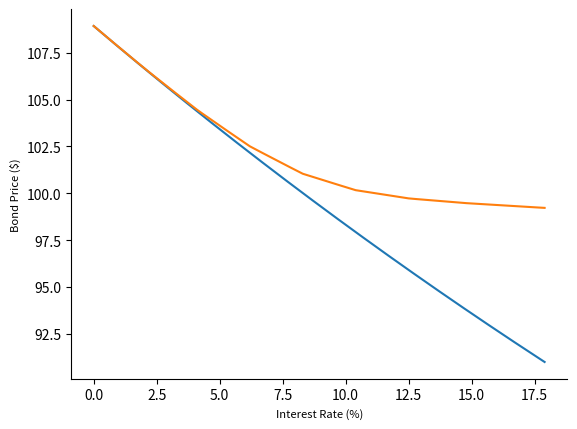

In [19]:
# %load ./B1_Ch12/B1_Ch12_10.py
# B1_Ch12_10.py


import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

def value_bond(a, s, grid_points, bond):
    model = ql.HullWhite(ts_handle, a, s)
    engine = ql.TreeCallableFixedRateBondEngine(model, grid_points)
    bond.setPricingEngine(engine)
    return bond

calc_date = ql.Date(16,8,2016)
ql.Settings.instance().evaluationDate = calc_date
day_count = ql.ActualActual(ql.ActualActual.Bond)
callability_schedule_call = ql.CallabilitySchedule()
callability_schedule_put = ql.CallabilitySchedule()
call_price = 100.0
call_date = ql.Date(15,ql.September,2016);
null_calendar = ql.NullCalendar();
for i in range(0,2):
    callability_price  = ql.BondPrice(
        call_price, ql.BondPrice.Clean)
    # callability_price  = ql.Callability(
    #     call_price, ql.Callability.clean)  
    callability_schedule_call.append(
            ql.Callability(callability_price, 
                           ql.Callability.Call,
                           call_date))
    callability_schedule_put.append(
            ql.Callability(callability_price, 
                           ql.Callability.Put,
                           call_date))

    call_date = null_calendar.advance(call_date, 12, ql.Months);
    
issue_date = ql.Date(16,ql.September,2015)        
maturity_date = ql.Date(15,ql.September,2017)
calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond)
tenor = ql.Period(ql.Quarterly)
accrual_convention = ql.Unadjusted

schedule = ql.Schedule(issue_date, maturity_date, tenor,
                       calendar, accrual_convention, accrual_convention,
                       ql.DateGeneration.Backward, False)    

settlement_days = 0
face_amount = 100
accrual_daycount = ql.ActualActual(ql.ActualActual.Bond)
coupon = 0.0825

bond = ql.FixedRateBond(
    settlement_days, face_amount,
    schedule, [coupon], accrual_daycount)

callable_bond = ql.CallableFixedRateBond(
    settlement_days, face_amount,
    schedule, [coupon], accrual_daycount,
    ql.Following, face_amount, issue_date,
    callability_schedule_call)

puttable_bond = ql.CallableFixedRateBond(
    settlement_days, face_amount,
    schedule, [coupon], accrual_daycount,
    ql.Following, face_amount, issue_date,
    callability_schedule_put)

rate = np.arange(0.0,0.18,0.001)
bond_price = np.zeros(len(rate))
callable_bond_price = np.zeros(len(rate))
puttable_bond_price = np.zeros(len(rate))

for i in range(len(rate)):
    ts = ql.FlatForward(calc_date, 
                        rate[i], 
                        day_count, 
                        ql.Compounded, 
                        ql.Semiannual)
    ts_handle = ql.YieldTermStructureHandle(ts)
    
    bondEngine = ql.DiscountingBondEngine(ts_handle)
    bond.setPricingEngine(bondEngine)

    callable_bond_price[i] = value_bond(0.03, 0.1, 80, callable_bond).cleanPrice()
    puttable_bond_price[i] = value_bond(0.03, 0.1, 80, puttable_bond).cleanPrice()
    bond_price[i] = bond.cleanPrice()

plt.figure(1)    
plt.plot(rate*100, bond_price)
plt.plot(rate*100, callable_bond_price)
plt.xlabel('Interest Rate (%)',fontsize=8)
plt.ylabel('Bond Price ($)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.figure(2)
plt.plot(rate*100, bond_price)
plt.plot(rate*100, puttable_bond_price)
plt.xlabel('Interest Rate (%)',fontsize=8)
plt.ylabel('Bond Price ($)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')


首先，其他因素相同的情況下，債券到期時間越長，凸性就越大。其次，如圖 12.27所示，其他因素相同的情況下，息票利率越大，債券的凸性越小。債券的存續期間也具有這樣的規律。

<img
  src="./img/ch12-27.png"
  alt="FRM_Python_1_12"
  width="300"
  height="180" />
  <img>

以下程式可以用來獲得圖 12-27。

[python-quantlib-typeerror](https://stackoverflow.com/questions/74329593/python-quantlib-typeerror-wrong-number-or-type-of-arguments-for-overloaded-fu)<br>
理由是存在多種不同的 30/360 慣例。預設建構函數用於選擇特定約定（即 30/360 債券基礎），但這使得使用者可能只指定 30/360 並在不知不覺中獲得錯誤的日期計數器。自此版本以來，您需要指定確切的約定。如果您想要像以前一樣的行為，請替換ql.Thirty360()為ql.Thirty360(ql.Thirty360.BondBasis)。相反，如果您意識到這些不是您想要的實際約定，請將正確的約定傳遞給日計數器的建構子。

這同樣適用於ql.ActualActual()，它過去預設為 ISDA，但在 1.28 中需要明確的約定：ql.ActualActual(ql.ActualActual.ISDA)
ql.ActualActual(ql.ActualActual.ISDA)

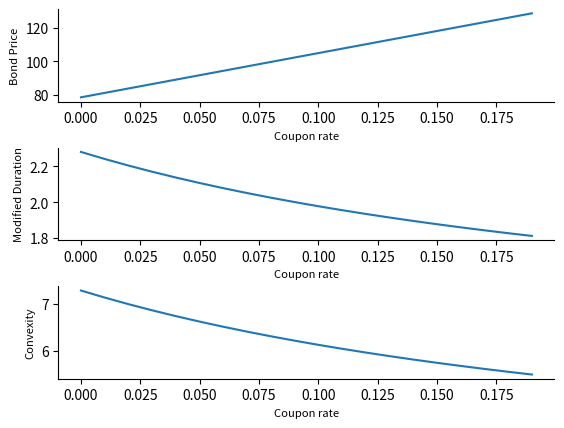

In [18]:
# %load ./B1_Ch12/B1_Ch12_11.py
# B1_Ch12_11.py


import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(10, 7, 2017)
ql.Settings.instance().evaluationDate = todaysDate
# dayCount = ql.Thirty360()
# calendar = ql.UnitedStates()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(15, 1, 2017)
maturityDate = ql.Date(15, 1, 2020)
tenor = ql.Period(ql.Semiannual)
# calendar = ql.UnitedStates()
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
# dayCount = ql.Thirty360()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
ytm = .1

# Now lets construct the FixedRateBond
settlementDays = 3
faceValue = 100

couponRate = np.arange(0,0.2,0.01)
duration_mod = np.zeros(len(couponRate))
dirtyPrice = np.zeros(len(couponRate))
convexity = np.zeros(len(couponRate))

for i in range(len(couponRate)):
    coupons = [couponRate[i]]
    fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)
    duration_mod[i] = ql.BondFunctions.duration(fixedRateBond,ytm,ql.ActualActual(ql.ActualActual.ISDA), ql.Compounded, ql.Annual, ql.Duration.Modified)
    convexity[i] = ql.BondFunctions.convexity(fixedRateBond,ytm,ql.ActualActual(ql.ActualActual.ISDA), ql.Compounded, ql.Annual)
    # cleanPrice[i] = fixedRateBond.cleanPrice(Coupon rate[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    dirtyPrice[i] = fixedRateBond.dirtyPrice(ytm,fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    
plt.figure(1)
plt.subplot(311)    
plt.plot(couponRate, dirtyPrice)
plt.xlabel('Coupon rate',fontsize=8)
plt.ylabel('Bond Price',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(312)    
plt.plot(couponRate, duration_mod)
plt.xlabel('Coupon rate',fontsize=8)
plt.ylabel('Modified Duration',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(313)   
plt.plot(couponRate, convexity)
plt.xlabel('Coupon rate',fontsize=8)
plt.ylabel('Convexity',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.subplots_adjust(hspace=0.5)


最後如圖 12-28所示，其他因素相同的情況下，到期收益率 YTM 越小，債券的凸性越大。債券的存續期間也是這樣。

<img
  src="./img/ch12-28.png"
  alt="FRM_Python_1_12"
  width="300"
  height="180" />
  <img>

 以下程式可以用來獲得圖 12-28。 

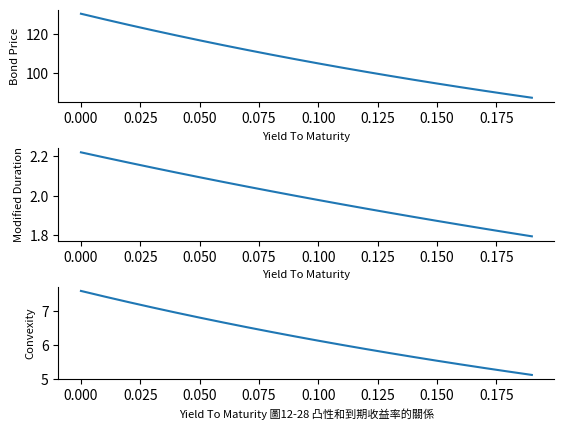

In [9]:
# %load ./B1_Ch12/B1_Ch12_12.py
# B1_Ch12_12.py


import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(10, 7, 2017)
ql.Settings.instance().evaluationDate = todaysDate
# dayCount = ql.Thirty360()
# calendar = ql.UnitedStates()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(15, 1, 2017)
maturityDate = ql.Date(15, 1, 2020)
tenor = ql.Period(ql.Semiannual)
# calendar = ql.UnitedStates()
# dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
# dayCount = ql.Thirty360()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
couponRate = .1
coupons = [couponRate]

# Now lets construct the FixedRateBond
settlementDays = 3
faceValue = 100
fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)

ytm = np.arange(0,0.2,0.01)
duration_mod = np.zeros(len(ytm))
dirtyPrice = np.zeros(len(ytm))
convexity = np.zeros(len(ytm))

for i in range(len(ytm)):
    y=ytm[i]
    duration_mod[i] = ql.BondFunctions.duration(fixedRateBond,y,ql.ActualActual(ql.ActualActual.ISDA), ql.Compounded, ql.Annual, ql.Duration.Modified)
    convexity[i] = ql.BondFunctions.convexity(fixedRateBond,y,ql.ActualActual(ql.ActualActual.ISDA), ql.Compounded, ql.Annual)
    dirtyPrice[i] = fixedRateBond.dirtyPrice(ytm[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    
plt.figure(1)
plt.subplot(311)    
plt.plot(ytm, dirtyPrice)
plt.xlabel('Yield To Maturity',fontsize=8)
plt.ylabel('Bond Price',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(312)    
plt.plot(ytm, duration_mod)
plt.xlabel('Yield To Maturity',fontsize=8)
plt.ylabel('Modified Duration',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(313)   
plt.plot(ytm, convexity)
plt.xlabel('Yield To Maturity 圖12-28 凸性和到期收益率的關係',fontsize=8)
plt.ylabel('Convexity',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.subplots_adjust(hspace=0.5)


類似有效存續期間的計算方法，有效凸性(Effective Convexity)可以透過式(12-24) 計算得到。
<font color=pink>
$$C_{eff}=\frac{P_{-\Delta y}+P_{+\Delta y}-2P_{0}}{P_{0}\times \Delta y^{2}}(式子12-24)$$
</font>

債券的價格變化可以用式 (12-25)估計。
<font color=pink>
$$\frac{\Delta P}{P}\approx -D\times \Delta y+\frac{1}{2}\Delta y^{2}\times C(式子12-25)$$
</font>

以上公式類似一元泰勒二階展開。其中，P和為債券價格;有為存續期間;$\Delta y$為到期收益率 YTM的變化。

收益率`y`變化 $\Delta y$時，泰勒二階展開法可以用來估算債券價值。

可以分別計算得到債券的存續期間D和凸性C，根據式 (12-26) 估算債券價值。
<font color=pink>
$$P_{Duration-convexity-approx}=P_{0}\left ( 1-D\cdot \Delta y+\frac{C}{2}\Delta y^{2} \right )(式子12-26)$$
</font>

如圖 12-29所示為債券收益率 y變化對債券價值的影響。如圖 12-30所示為債券估值和實際值之間的誤差，即圖 12-29中藍色曲線和紅色直線之差。

<img
  src="./img/ch12-29&30.png"
  alt="FRM_Python_1_12"
  width="300"
  height="180" />
  <img>

以下程式可以繪製圖 12-29和圖 12-30。

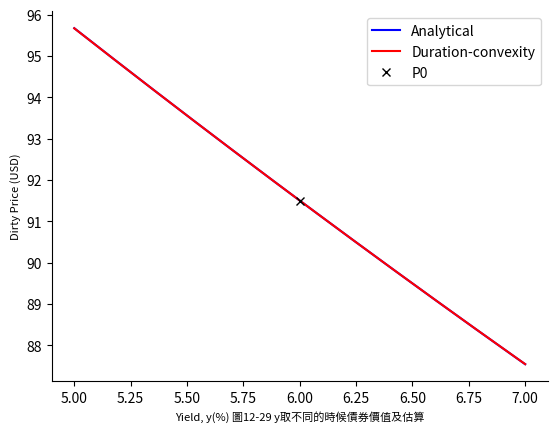

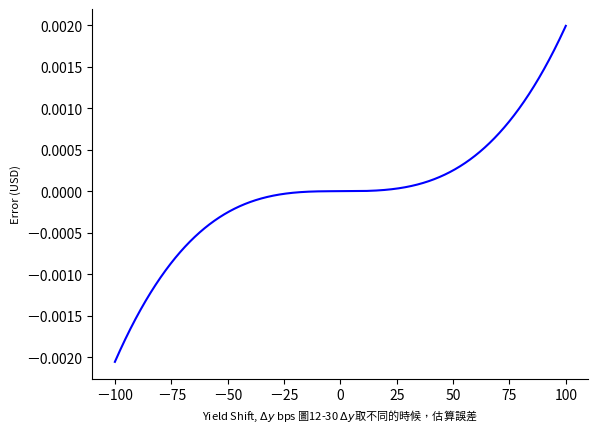

In [15]:
# %load ./B1_Ch12/B1_Ch12_13.py
# B1_Ch12_13.py

import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt

todaysDate = ql.Date(1, 7, 2020)
ql.Settings.instance().evaluationDate = todaysDate
# dayCount = ql.Thirty360()
# calendar = ql.UnitedStates()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
interpolation = ql.Linear()
compounding = ql.Compounded
compoundingFrequency = ql.Annual

issueDate = ql.Date(1, 7, 2020)
maturityDate = ql.Date(15, 7, 2025)
# maturityDate = advance('UnitedStates/GovernmentBond', as.Date('2020-01-15'), 10, 3)
tenor = ql.Period(ql.Semiannual)
# calendar = ql.UnitedStates()
calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
bussinessConvention = ql.Unadjusted
dateGeneration = ql.DateGeneration.Backward
monthEnd = False
schedule = ql.Schedule (issueDate, maturityDate, tenor, calendar, bussinessConvention,
                            bussinessConvention , dateGeneration, monthEnd)

# Now lets build the coupon
# dayCount = ql.Thirty360()
dayCount = ql.Thirty360(ql.Thirty360.BondBasis)
couponRate = .04
coupons = [couponRate]

# Now lets construct the FixedRateBond
settlementDays = 3
faceValue = 100
fixedRateBond = ql.FixedRateBond(settlementDays, faceValue, schedule, coupons, dayCount)

delta_y_base = 0.0001
ytm = np.arange(5.0,7.0,delta_y_base)*0.01
approxPrice = np.zeros(len(ytm))
dirtyPrice = np.zeros(len(ytm))
delta_y = np.zeros(len(ytm))

P0 = fixedRateBond.dirtyPrice(0.06,fixedRateBond.dayCounter(), compounding, ql.Semiannual)
P_up = fixedRateBond.dirtyPrice(0.060 + delta_y_base,fixedRateBond.dayCounter(), compounding, ql.Semiannual)
P_down = fixedRateBond.dirtyPrice(0.060 - delta_y_base,fixedRateBond.dayCounter(), compounding, ql.Semiannual)
duration = (P_down - P_up)/(2*P0*delta_y_base)
convexity = (P_down + P_up - 2*P0)/(P0*delta_y_base*delta_y_base)

for i in range(len(ytm)):
    delta_y[i] = ytm[i] - 0.06
    approxPrice[i] = P0*(1 - duration*delta_y[i] + 0.5*convexity*delta_y[i]*delta_y[i])
    dirtyPrice[i] = fixedRateBond.dirtyPrice(ytm[i],fixedRateBond.dayCounter(), compounding, ql.Semiannual)
    
plt.figure(1)    
plt.plot(ytm*100, dirtyPrice,label='Analytical',color = 'b')
plt.plot(ytm*100, approxPrice,color ='r',label='Duration-convexity')
plt.plot(6, P0,'x',color ='k',fillstyle='none',label='P0')
plt.legend(loc='upper right')
plt.xlabel('Yield, y(%) 圖12-29 y取不同的時候債券價值及估算',fontsize=8)
plt.ylabel('Dirty Price (USD)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.figure(2) 
plt.plot(delta_y*10000, approxPrice-dirtyPrice,color ='b')
plt.xlabel('Yield Shift, $\Delta y$ bps 圖12-30 $\Delta y$取不同的時候，估算誤差',fontsize=8)
plt.ylabel('Error (USD)',fontsize=8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')


本章首先介紹了時間價值，然後引出普通債券及其性質、定價、收益率等，接著進一步介紹存續期間和凸性這兩個分析債券的重要概念。對於固定收益產品而言，這些是非常基礎的基礎知識，讀者朋友們需要十分熟練地掌握。